In [175]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer, StandardScaler

In [176]:
df=pd.read_csv("database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [177]:
print(df.shape)
df.columns

(23412, 21)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [178]:
df.dropna(axis=1,inplace=True)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [179]:
print(df.shape)
df.columns

(23412, 12)


Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude',
       'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   ID                23412 non-null  object 
 8   Source            23412 non-null  object 
 9   Location Source   23412 non-null  object 
 10  Magnitude Source  23412 non-null  object 
 11  Status            23412 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.1+ MB


In [181]:
df.isnull().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [182]:
df.duplicated().sum()

np.int64(0)

In [183]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='%H:%M:%S')
df.dropna(subset={'Date','Time'},inplace=True)

In [184]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Time'].dt.hour
df['Min'] = df['Time'].dt.minute

In [185]:
df['Type'].value_counts()

Type
Earthquake           23229
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: count, dtype: int64

In [186]:
df['Status'].value_counts()

Status
Reviewed     20770
Automatic     2639
Name: count, dtype: int64

In [187]:
print(df['Magnitude Source'].nunique())
df['Magnitude Source'].value_counts()

24


Magnitude Source
US          10457
HRV          8222
ISCGEM       2580
GCMT         1488
NC            533
CI             61
AK             12
PAR             9
OFFICIAL        8
GUC             6
UW              6
NIED            4
NN              4
ATLAS           3
1000            3
US_GCMT         3
PGC             2
BRK             2
1020            1
1023            1
1009            1
SE              1
US_PGC          1
PR              1
Name: count, dtype: int64

In [188]:
year_mag=df.groupby('Year')['Magnitude'].mean().reset_index()
display(year_mag)

,Year,Magnitude
0,1965,6.014159
1,1966,6.040470
2,1967,6.003922
3,1968,6.078525
4,1969,6.009350
5,1970,6.035768
6,1971,5.972539
7,1972,5.943814
8,1973,5.814065
9,1974,5.830332


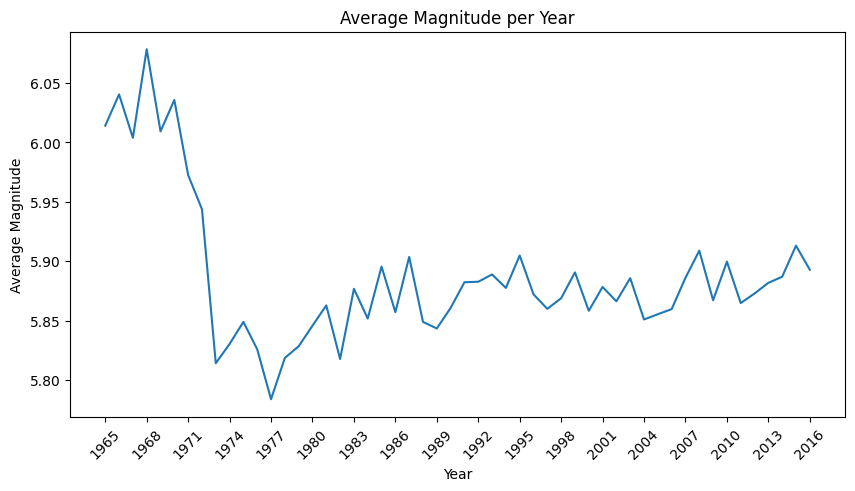

In [189]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Magnitude', data=year_mag)
plt.title("Average Magnitude per Year")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.xticks(ticks=year_mag['Year'][::3], rotation=45) 
plt.show()

In [190]:
label_cols = ['Type', 'Source', 'Location Source', 'Magnitude Source', 'Status']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

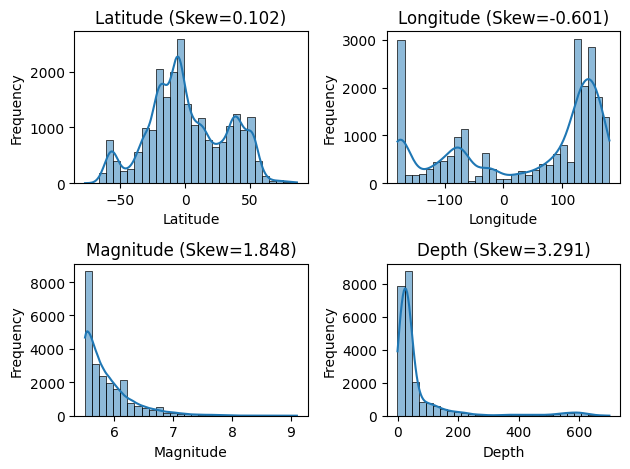

In [191]:
numeric_cols = ['Latitude','Longitude','Magnitude','Depth']
skew = df[numeric_cols].skew()
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} (Skew={skew[col]:.3f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

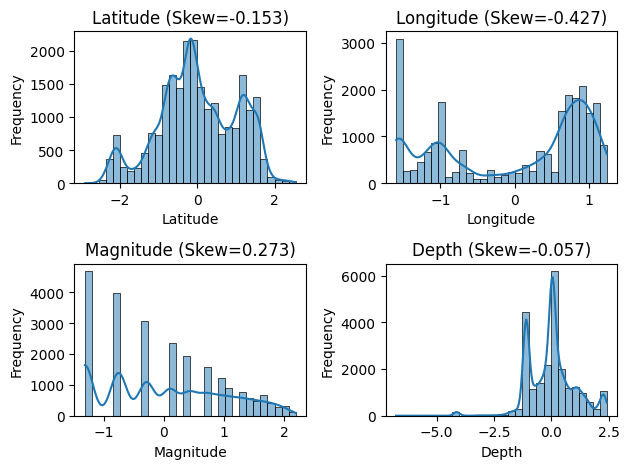

In [192]:
pt = PowerTransformer(method='yeo-johnson')  
df[numeric_cols] = pt.fit_transform(df[numeric_cols])
skew_pt = df[numeric_cols].skew()
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} (Skew={skew_pt[col]:.3f})')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

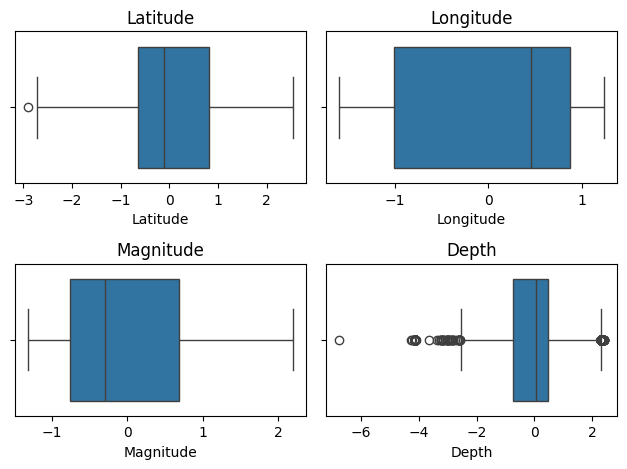

In [193]:
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

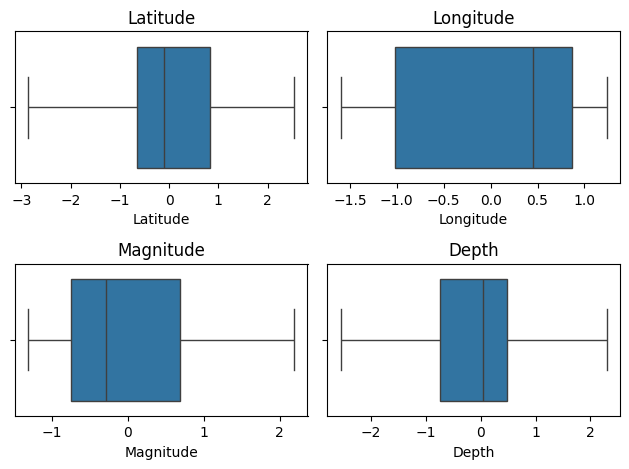

In [194]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [195]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Hour,Min
0,1965-01-02,1900-01-01 13:44:18,0.616320,0.878693,0,1.215343,0.687562,ISCGEM860706,4,20,11,0,1965,1,13,44
1,1965-01-04,1900-01-01 11:29:49,0.084797,0.690368,0,0.812308,0.095283,ISCGEM860737,4,20,11,0,1965,1,11,29
2,1965-01-05,1900-01-01 18:05:58,-0.722673,-1.564827,0,-0.427436,1.104253,ISCGEM860762,4,20,11,0,1965,1,18,5
3,1965-01-08,1900-01-01 18:49:43,-2.197250,-0.698554,0,-0.703480,0.095283,ISCGEM860856,4,20,11,0,1965,1,18,49
4,1965-01-09,1900-01-01 13:32:50,0.396817,0.680872,0,-0.703480,0.095283,ISCGEM860890,4,20,11,0,1965,1,13,32


In [196]:
features = ['Latitude', 'Longitude', 'Depth', 'Magnitude','Type', 'Source', 'Magnitude Source', 
            'Status','Year', 'Month']
X = df[features]

In [197]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [198]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [199]:
print("Explained Variance:", pca.explained_variance_)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

Explained Variance: [2.55996644 1.29318919]
Explained Variance Ratio: [0.25598571 0.12931339]
Total Variance Explained: 0.3852991031111833


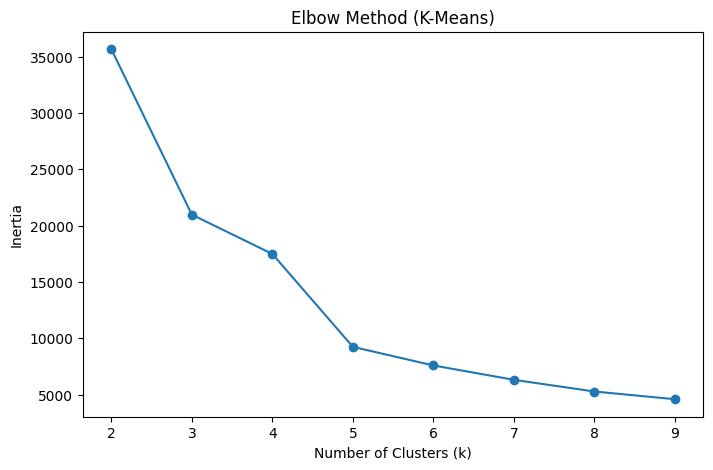

In [200]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia, marker='o')
plt.title("Elbow Method (K-Means)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [201]:
sil_scores = []
K_range = range(2, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)
    sil_scores.append(sil)
    print(f"K={k}, Silhouette Score={sil:.4f}")

K=2, Silhouette Score=0.7468
K=3, Silhouette Score=0.7640
K=4, Silhouette Score=0.3223
K=5, Silhouette Score=0.4353
K=6, Silhouette Score=0.4222
K=7, Silhouette Score=0.4231
K=8, Silhouette Score=0.3931
K=9, Silhouette Score=0.3784
K=10, Silhouette Score=0.3749


In [202]:
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)
label_counts_km = pca_df['KMeans_Cluster'].value_counts().sort_index()
print("Cluster label counts:")
print(label_counts_km)

Cluster label counts:
KMeans_Cluster
0    20534
1      178
2     2697
Name: count, dtype: int64


In [203]:
kmeans_mapping = {
    0: "Cluster 0 - Stronger Earthquake Zone",
    1: "Cluster 1 - Moderate/Calmer Zone",
    2: "Cluster 2 - Minor/Inactive Zone"
}
pca_df['KMeans_Cluster_Name'] = pca_df['KMeans_Cluster'].map(kmeans_mapping)

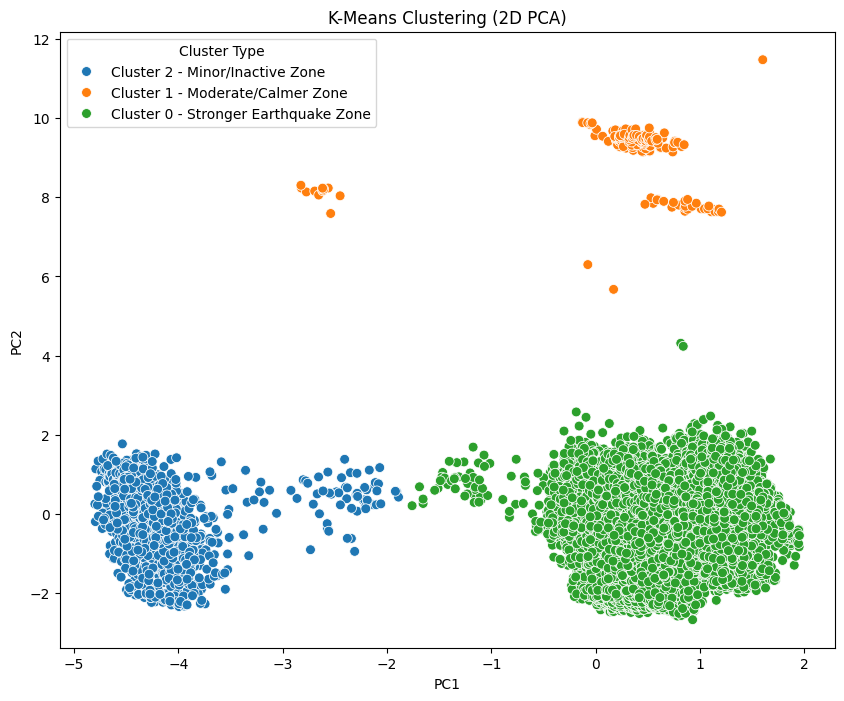

In [204]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster_Name',data=pca_df,s=50)
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.show()

In [205]:
sil_km = silhouette_score(X_pca, pca_df['KMeans_Cluster'])
print(f"Silhouette Score={sil_km:.4f}")
dbi_km = davies_bouldin_score(X_pca, pca_df['KMeans_Cluster'])
print(f"Davies-Bouldin index={dbi_km:.4f}")
ch_km = calinski_harabasz_score(X_pca, pca_df['KMeans_Cluster'])
print(f"Calinski-Harabasz Score = {ch_km:.4f}")

Silhouette Score=0.7640
Davies-Bouldin index=0.2728
Calinski-Harabasz Score = 38621.8230


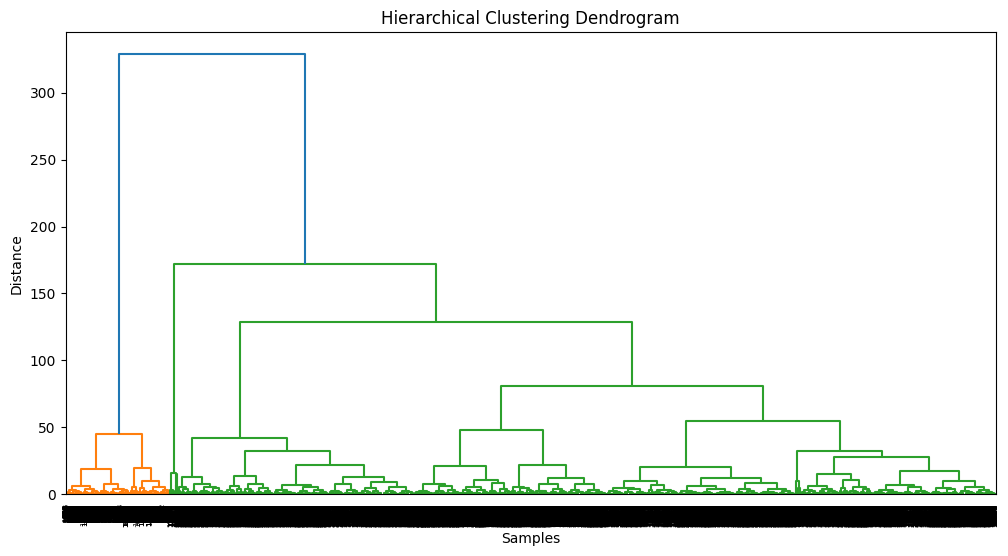

In [206]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X_pca, method='ward')  
plt.figure(figsize=(12,6))
dendrogram(Z) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [207]:
hc_labels = fcluster(Z, t=3, criterion='maxclust')
pca_df['Hier_Cluster'] = hc_labels
label_counts_hc = pca_df['Hier_Cluster'].value_counts()
print("Cluster label counts:")
print(label_counts_hc)

Cluster label counts:
Hier_Cluster
3    20598
1     2631
2      180
Name: count, dtype: int64


In [208]:
hc_mapping = {
    1: "Cluster 1 - moderate-risk regions",
    2: "Cluster 2 - rare/unusual events",
    3: "Cluster 3 - core earthquake activity area"
}
pca_df['Hier_Cluster_Name'] = pca_df['Hier_Cluster'].map(hc_mapping)

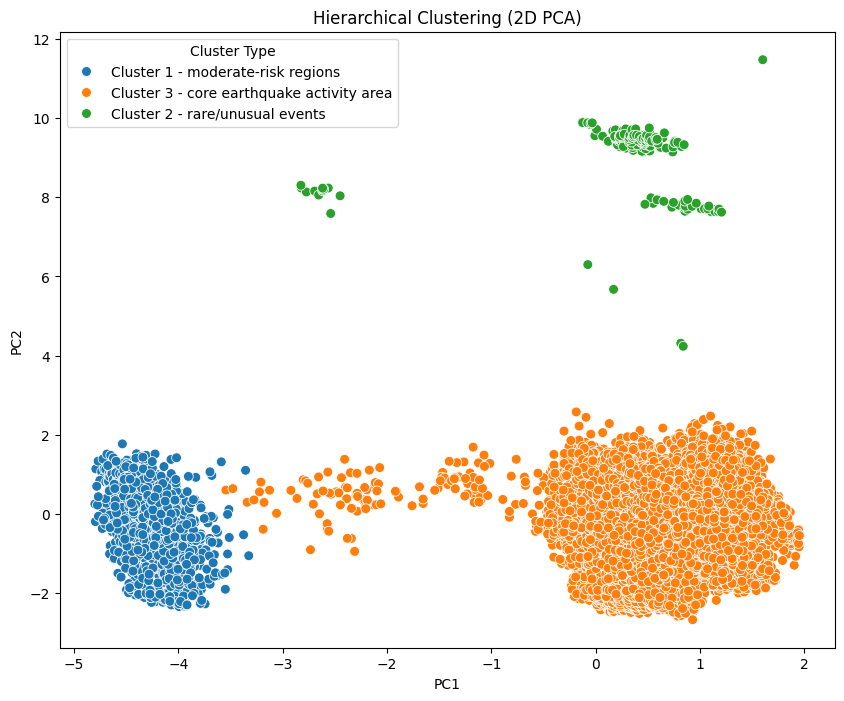

In [209]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Hier_Cluster_Name',data=pca_df,s=50)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.show()

In [210]:
sil_hc = silhouette_score(X_pca, pca_df['Hier_Cluster'])
print(f"Silhouette Score={sil_hc:.4f}")
dbi_hc = davies_bouldin_score(X_pca, pca_df['Hier_Cluster'])
print(f"Davies-Bouldin index={dbi_hc:.4f}")
ch_hc = calinski_harabasz_score(X_pca, pca_df['Hier_Cluster'])
print(f"Calinski-Harabasz Score = {ch_hc:.4f}")

Silhouette Score=0.7631
Davies-Bouldin index=0.2712
Calinski-Harabasz Score = 37613.6233


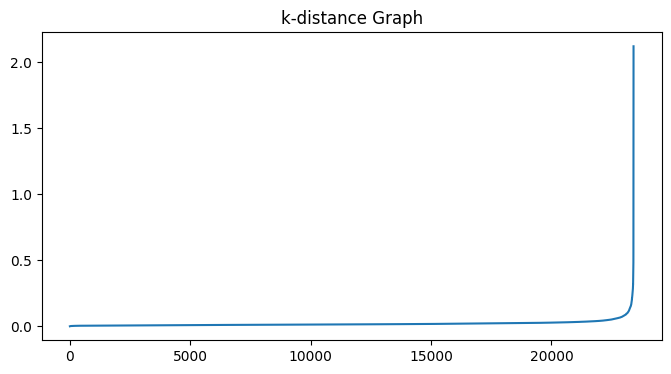

In [211]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.title('k-distance Graph')
plt.show()

In [212]:
eps_values = np.arange(0.1, 1.5, 0.1)

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    labels = dbscan.fit_predict(X_pca)
    mask = labels != -1
    valid_labels = labels[mask]
    valid_points = X_pca[mask]

    if len(set(valid_labels)) > 1:
        sil = silhouette_score(valid_points, valid_labels)
        print(f"eps={eps:.2f}, Silhouette Score={sil:.4f}")
    else:
        print(f"eps={eps:.2f}, Silhouette Score: Invalid")


eps=0.10, Silhouette Score=0.3102
eps=0.20, Silhouette Score=0.2516
eps=0.30, Silhouette Score=0.3684
eps=0.40, Silhouette Score=0.7554
eps=0.50, Silhouette Score=0.7550
eps=0.60, Silhouette Score=0.7550
eps=0.70, Silhouette Score=0.7550
eps=0.80, Silhouette Score=0.7550
eps=0.90, Silhouette Score=0.7550
eps=1.00, Silhouette Score=0.7550
eps=1.10, Silhouette Score=0.7550
eps=1.20, Silhouette Score=0.7749
eps=1.30, Silhouette Score=0.7749
eps=1.40, Silhouette Score=0.7749


In [213]:
dbscan = DBSCAN(eps=1.2, min_samples=4)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(X_pca)
label_counts_db = pca_df['DBSCAN_Cluster'].value_counts()
print("Cluster label counts:")
print(label_counts_db)

Cluster label counts:
DBSCAN_Cluster
 0    23229
 2      163
 1       12
-1        5
Name: count, dtype: int64


In [214]:
db_mapping = {
    0: "Cluster 0 - High-density seismic activity",
    1: "Cluster 1 - Moderate-density seismic region",
    2: "Cluster 2 - Small/frequent-sparse events",
    -1: "Cluster -1 - Noise/Outliers"
}
pca_df['DBSCAN_Cluster_Name'] = pca_df['DBSCAN_Cluster'].map(db_mapping)

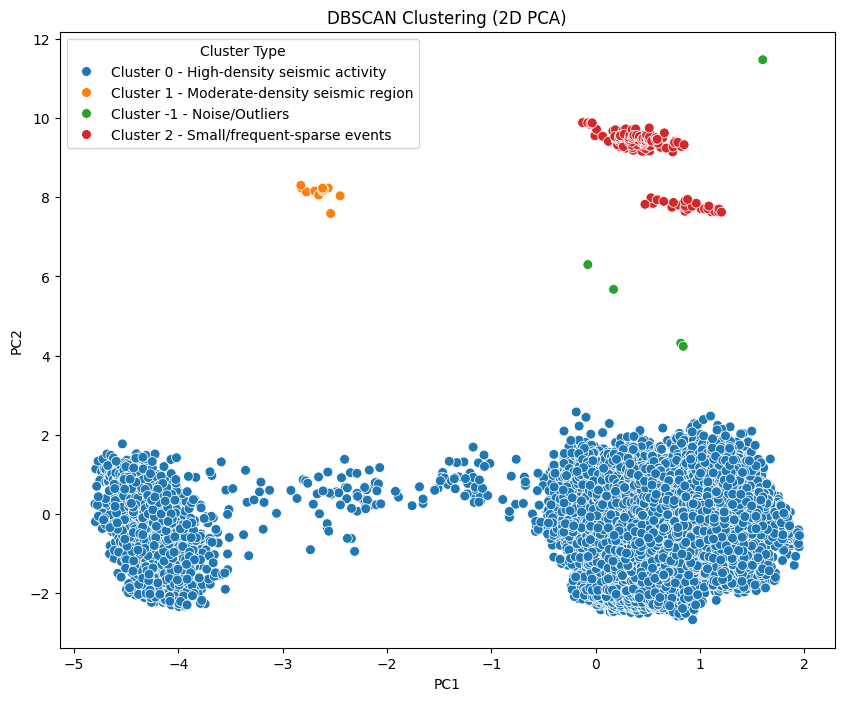

In [215]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster_Name',data=pca_df,s=50)
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster Type')
plt.show()

In [216]:
mask = pca_df['DBSCAN_Cluster'] != -1 
sil_db = silhouette_score(X_pca[mask], pca_df['DBSCAN_Cluster'][mask])
print(f"Silhouette Score={sil_db:.4f}")
dbi_db = davies_bouldin_score(X_pca[mask], pca_df['DBSCAN_Cluster'][mask])
print(f"Davies-Bouldin index={dbi_db:.4f}")
ch_db = calinski_harabasz_score(X_pca[mask], pca_df['DBSCAN_Cluster'][mask])
print(f"Calinski-Harabasz Score = {ch_db:.4f}")

Silhouette Score=0.7749
Davies-Bouldin index=0.2141
Calinski-Harabasz Score = 2288.1699
